In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
# Set the global random seed
np.random.seed(10)


In [6]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=10)


In [7]:
# Define the parameter grid
param_grid = {
    'rf__n_estimators': np.arange(5, 156, 10),
    'rf__max_depth': np.arange(1, 27, 5),
    'rf__max_features': np.arange(1, 27, 5),
    'rf__criterion': ['gini']
}

# Create a pipeline with preprocessing and random forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state = 10))
])

# Store accuracies for different seeds
accuracies = []
best_overall_model = None
best_overall_accuracy = 0
best_overall_params = {}

# Perform grid search for different seeds
for seed in range(10, 110, 10):
    pipeline.set_params(rf__random_state=seed)
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    
    if accuracy > best_overall_accuracy:
        best_overall_accuracy = accuracy
        best_overall_model = best_model
        best_overall_params = grid_search.best_params_

    print(f"Seed: {seed} - Best Hyperparameters: {grid_search.best_params_} - Validation Accuracy: {accuracy}")

# Report mean accuracy
mean_accuracy = np.mean(accuracies)
print(f"Mean Validation Accuracy over different seeds: {mean_accuracy}")

# Save the best model
joblib.dump(best_overall_params, 'best_random_forest_model.pkl')
print("Best model saved as 'best_random_forest_model.pkl'")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Seed: 10 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(11), 'rf__max_features': np.int64(6), 'rf__n_estimators': np.int64(65)} - Validation Accuracy: 0.9418604651162791
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Seed: 20 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(6), 'rf__max_features': np.int64(11), 'rf__n_estimators': np.int64(125)} - Validation Accuracy: 0.9534883720930233
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Seed: 30 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(6), 'rf__max_features': np.int64(16), 'rf__n_estimators': np.int64(65)} - Validation Accuracy: 0.9418604651162791
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Seed: 40 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(6), 'rf__max_features': np.int64(6), 'rf__n_estimators': np.int64(45)} - Validation Accuracy: 0.9186046511627907
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Seed: 50 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(6), 'rf__max_features': np.int64(11), 'rf__n_estimators': np.int64(55)} - Validation Accuracy: 0.9418604651162791
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Seed: 60 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(11), 'rf__max_features': np.int64(6), 'rf__n_estimators': np.int64(95)} - Validation Accuracy: 0.9418604651162791
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Seed: 70 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(11), 'rf__max_features': np.int64(6), 'rf__n_estimators': np.int64(15)} - Validation Accuracy: 0.9651162790697675
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Seed: 80 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(6), 'rf__max_features': np.int64(6), 'rf__n_estimators': np.int64(15)} - Validation Accuracy: 0.9534883720930233
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Seed: 90 - Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(6), 'rf__max_features': np.int64(6), 'rf__n_estimators': np.int64(25)} - Validation Accuracy: 0.9534883720930233
Fitting 5 fold

In [8]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score (accuracy):", best_score)


Best parameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(6), 'rf__max_features': np.int64(6), 'rf__n_estimators': np.int64(155)}
Best cross-validation score (accuracy): 0.9647058823529413


In [9]:
# Create a new pipeline with the best parameters
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(**{k.split('__')[1]: v for k, v in best_params.items()}))
])

# Fit the model on the combined train and validation data
best_pipeline.fit(X_train_val, y_train_val)

# Predict on the test set
y_pred = best_pipeline.predict(X_test)


In [10]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
cm = confusion_matrix(y_test, y_pred)

# Print results
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nConfusion Matrix:")
print(cm)

# Print class-specific metrics
for i in range(2):
    print(f"\nMetrics for class {i}:")
    print(f"F1 Score: {f1[i]:.4f}")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")



Test Set Metrics:
Accuracy: 0.9860
F1 Score: [0.98113208 0.98888889]
Precision: [0.96296296 1.        ]
Recall: [1.         0.97802198]

Confusion Matrix:
[[52  0]
 [ 2 89]]

Metrics for class 0:
F1 Score: 0.9811
Precision: 0.9630
Recall: 1.0000

Metrics for class 1:
F1 Score: 0.9889
Precision: 1.0000
Recall: 0.9780


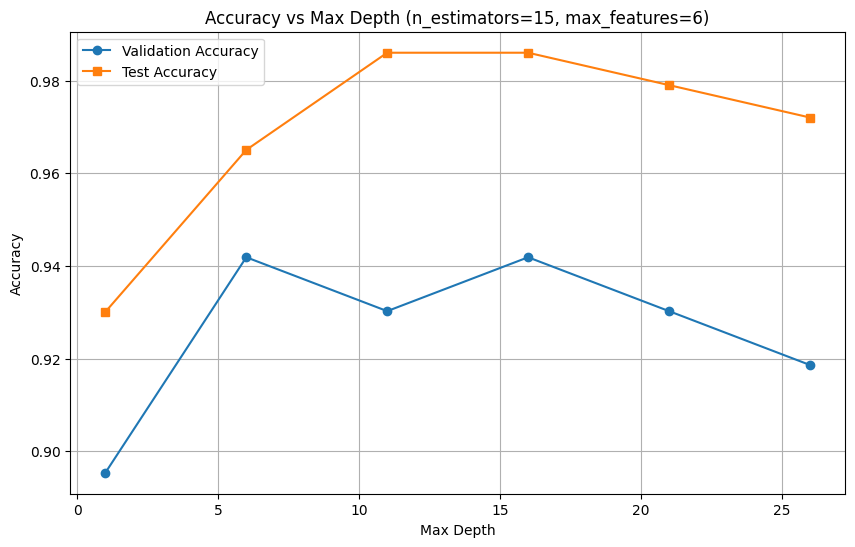


Validation Accuracies: [0.8953488372093024, 0.9418604651162791, 0.9302325581395349, 0.9418604651162791, 0.9302325581395349, 0.9186046511627907]
Test Accuracies: [0.9300699300699301, 0.965034965034965, 0.986013986013986, 0.986013986013986, 0.9790209790209791, 0.972027972027972]


In [14]:
import matplotlib.pyplot as plt
# Extract best n_estimators and max_features
best_n_estimators = best_overall_params['rf__n_estimators']
best_max_features = best_overall_params['rf__max_features']

# Create lists to store results
max_depths = np.arange(1, 27, 5)
val_accuracies = []
test_accuracies = []
train_accuracies = []

# Iterate over max_depths
for max_depth in max_depths:
    # Create and fit the model
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=best_n_estimators, 
                                      max_features=best_max_features, 
                                      max_depth=max_depth, 
                                      criterion='gini'))
    ])
    model.fit(X_train, y_train)
    
    # Calculate validation accuracy
    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_acc)
    
    # Calculate test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(max_depths, val_accuracies, marker='o', label='Validation Accuracy')
plt.plot(max_depths, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title(f'Accuracy vs Max Depth (n_estimators={best_n_estimators}, max_features={best_max_features})')
plt.legend()
plt.grid(True)
plt.show()

# Print the accuracies
print("\nValidation Accuracies:", val_accuracies)
print("Test Accuracies:", test_accuracies)

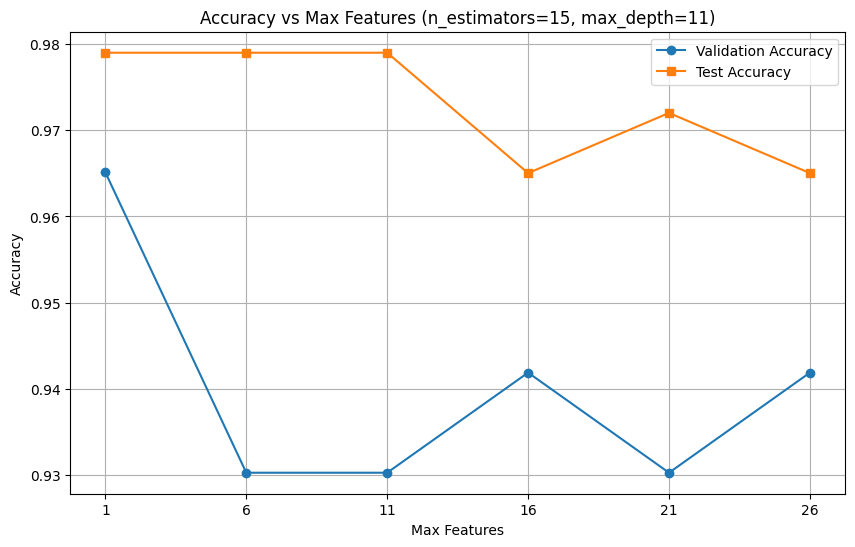


Validation Accuracies: [0.9651162790697675, 0.9302325581395349, 0.9302325581395349, 0.9418604651162791, 0.9302325581395349, 0.9418604651162791]
Test Accuracies: [0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.965034965034965, 0.972027972027972, 0.965034965034965]


In [15]:
# Extract best n_estimators and max_depth
best_n_estimators = best_overall_params['rf__n_estimators']
best_max_depth = best_overall_params['rf__max_depth']

# Create list of max_features values to test
max_features_range = range(1, 27, 5)
val_accuracies = []
test_accuracies = []

# Iterate over max_features values
for max_features in max_features_range:
    # Create and fit the model
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=best_n_estimators, 
                                      max_depth=best_max_depth, 
                                      max_features=max_features, 
                                      criterion='gini'))
    ])
    model.fit(X_train, y_train)
    
    # Calculate validation accuracy
    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_acc)
    
    # Calculate test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, val_accuracies, marker='o', label='Validation Accuracy')
plt.plot(max_features_range, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title(f'Accuracy vs Max Features (n_estimators={best_n_estimators}, max_depth={best_max_depth})')
plt.legend()
plt.grid(True)
plt.xticks(max_features_range)
plt.show()

# Print the accuracies
print("\nValidation Accuracies:", val_accuracies)
print("Test Accuracies:", test_accuracies)


In [16]:
import pandas as pd

#rf_params = pd.DataFrame(best_params)
best_overall_params

{'rf__criterion': 'gini',
 'rf__max_depth': np.int64(11),
 'rf__max_features': np.int64(6),
 'rf__n_estimators': np.int64(15)}

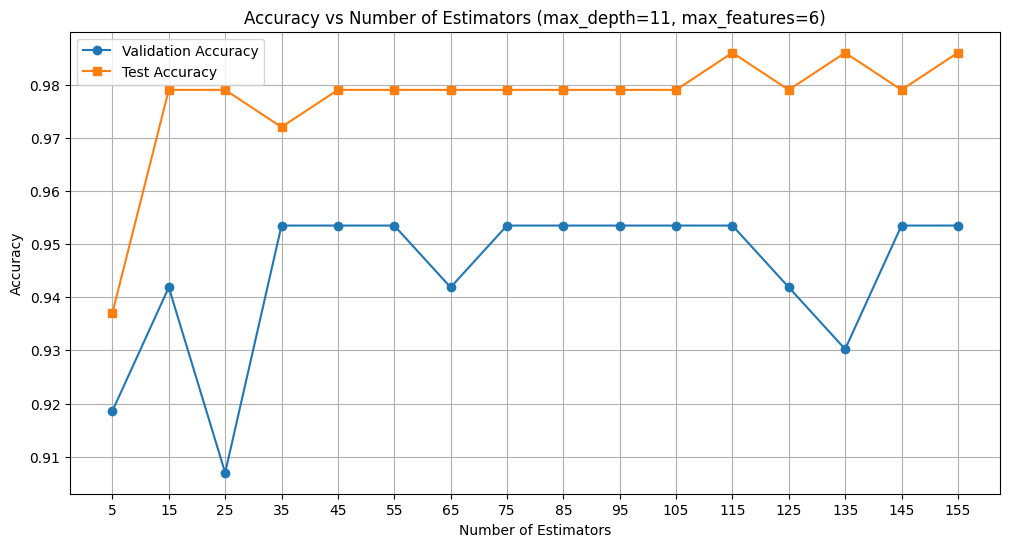


Validation Accuracies: [0.9186046511627907, 0.9418604651162791, 0.9069767441860465, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9418604651162791, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9418604651162791, 0.9302325581395349, 0.9534883720930233, 0.9534883720930233]
Test Accuracies: [0.9370629370629371, 0.9790209790209791, 0.9790209790209791, 0.972027972027972, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.986013986013986, 0.9790209790209791, 0.986013986013986, 0.9790209790209791, 0.986013986013986]


In [17]:

# Extract best max_depth and max_features
best_max_depth = best_overall_params['rf__max_depth']
best_max_features = best_overall_params['rf__max_features']

# Create list of n_estimators values to test
n_estimators_range = range(5, 156, 10)
val_accuracies = []
test_accuracies = []

# Iterate over n_estimators values
for n_estimators in n_estimators_range:
    # Create and fit the model
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=n_estimators, 
                                      max_depth=best_max_depth, 
                                      max_features=best_max_features, 
                                      criterion='gini'))
    ])
    model.fit(X_train, y_train)
    
    # Calculate validation accuracy
    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_acc)
    
    # Calculate test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, val_accuracies, marker='o', label='Validation Accuracy')
plt.plot(n_estimators_range, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title(f'Accuracy vs Number of Estimators (max_depth={best_max_depth}, max_features={best_max_features})')
plt.legend()
plt.grid(True)
plt.xticks(n_estimators_range)
plt.show()

# Print the accuracies
print("\nValidation Accuracies:", val_accuracies)
print("Test Accuracies:", test_accuracies)


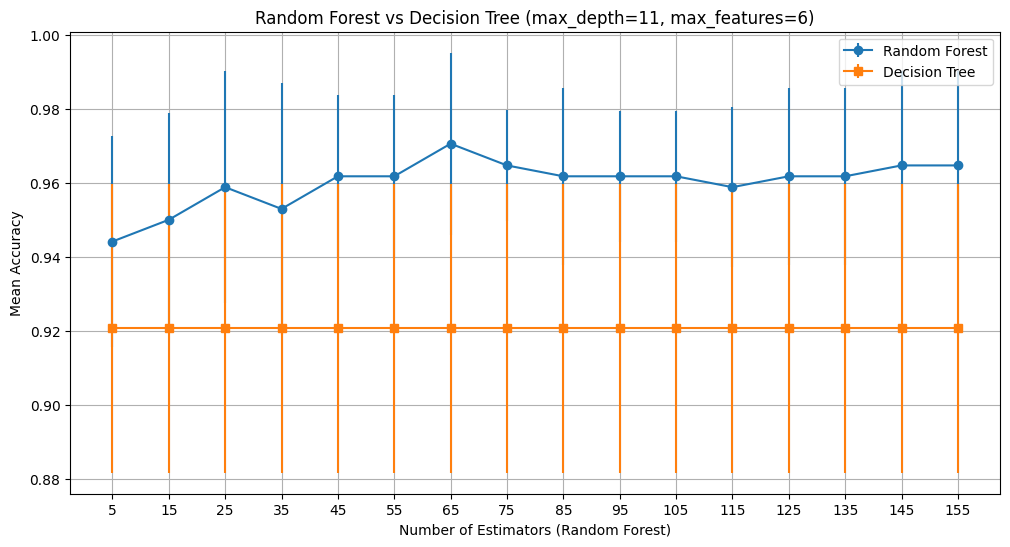


Random Forest Mean Accuracies: [np.float64(0.9441176470588235), np.float64(0.95), np.float64(0.9588235294117646), np.float64(0.9529411764705882), np.float64(0.9617647058823529), np.float64(0.9617647058823529), np.float64(0.9705882352941178), np.float64(0.9647058823529413), np.float64(0.9617647058823529), np.float64(0.9617647058823529), np.float64(0.9617647058823529), np.float64(0.9588235294117646), np.float64(0.9617647058823529), np.float64(0.9617647058823529), np.float64(0.9647058823529413), np.float64(0.9647058823529413)]
Random Forest Standard Deviations: [np.float64(0.028515763867154886), np.float64(0.02881752638568446), np.float64(0.03140317132950387), np.float64(0.0340465791258536), np.float64(0.02200974933396436), np.float64(0.02200974933396436), np.float64(0.024607647839237533), np.float64(0.01499711621644938), np.float64(0.023894230601870483), np.float64(0.01764705882352943), np.float64(0.01764705882352943), np.float64(0.02161314478926334), np.float64(0.023894230601870483), n

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Extract best max_depth and max_features for Random Forest

# Create list of n_estimators values to test
n_estimators_range = range(5, 156, 10)
rf_mean_accuracies = []
rf_std_accuracies = []
dt_mean_accuracies = []
dt_std_accuracies = []

# Iterate over n_estimators values
for n_estimators in n_estimators_range:
    # Random Forest
    rf_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=n_estimators, 
                                      max_depth=best_max_depth, 
                                      max_features=best_max_features, 
                                      criterion='gini',
                                      random_state=10))
    ])
    
    rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
    rf_mean_accuracies.append(rf_scores.mean())
    rf_std_accuracies.append(rf_scores.std())
    
    # Decision Tree
    dt_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('dt', DecisionTreeClassifier(max_depth=best_max_depth,  # Using same max_depth as RF
                                      max_features = best_max_features, 
                                      criterion='gini',
                                      random_state=10))
    ])
    
    dt_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=5, scoring='accuracy')
    dt_mean_accuracies.append(dt_scores.mean())
    dt_std_accuracies.append(dt_scores.std())

# Create the plot
plt.figure(figsize=(12, 6))
plt.errorbar(n_estimators_range, rf_mean_accuracies, yerr=rf_std_accuracies, fmt='-o', label='Random Forest')
plt.errorbar(n_estimators_range, dt_mean_accuracies, yerr=dt_std_accuracies, fmt='-s', label='Decision Tree')
plt.xlabel('Number of Estimators (Random Forest)')
plt.ylabel('Mean Accuracy')
plt.title(f'Random Forest vs Decision Tree (max_depth={best_max_depth}, max_features={best_max_features})')
plt.legend()
plt.grid(True)
plt.xticks(n_estimators_range)
plt.show()

# Print the mean accuracies
print("\nRandom Forest Mean Accuracies:", rf_mean_accuracies)
print("Random Forest Standard Deviations:", rf_std_accuracies)
print("\nDecision Tree Mean Accuracies:", dt_mean_accuracies)
print("Decision Tree Standard Deviations:", dt_std_accuracies)


In [19]:
dt_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('dt', DecisionTreeClassifier(max_depth=best_max_depth,  # Using same max_depth as RF
                                      max_features = best_max_features, 
                                      criterion='gini',
                                      random_state=10))
    ])
dt_pipeline.fit(X_train_val,y_train_val)
y_pred_dt = dt_pipeline.predict(X_test)
accurcy_dt = accuracy_score(y_test,y_pred_dt)
accurcy_dt

0.9370629370629371